# Data Visualization

## Matplotlib Overview

Matplotlib is a library of data visualization with Python.

Similar to R’s ggplot2 and MATLAB’s plotting functions

It is an excellent 2D and 3D graphics library for generating scientific figures. 

    
    
### Basic plotting: matplotlib.pyplot.plot

In [1]:
# Import the `matplotlib.pyplot` module under the name `plt`:
import matplotlib.pyplot as plt
# Jupyter “magic” command to make images appear in-line.
%matplotlib inline

That line is only for jupyter notebooks, if you are using another editor, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

In [2]:
# ** The data we want to plot:**
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

### line plot

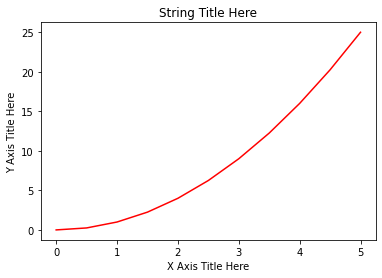

In [3]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

### Creating subplots 

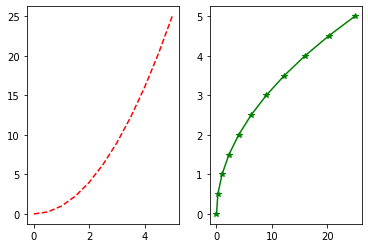

In [4]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

### Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

The main idea in using the more formal Object Oriented method is to ``create figure objects and then just call methods or attributes off of that object``. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://matplotlib.org/1.5.1/_images/fig_map.png")

In [6]:
Image(url= "https://matplotlib.org/3.1.1/_images/anatomy.png")

Text(0.5, 1.0, 'Set Title')

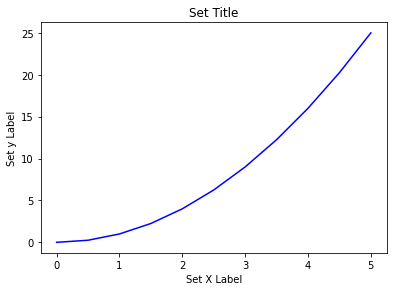

In [7]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

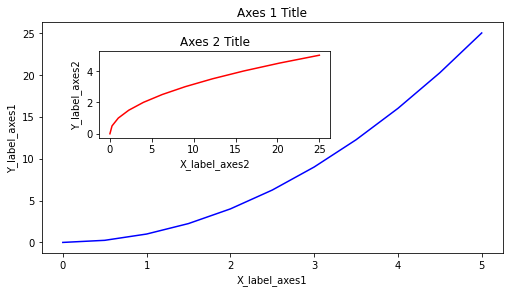

In [8]:
# Creates blank canvas
fig = plt.figure(figsize=(8,4))

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 1 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

### subplots()


The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

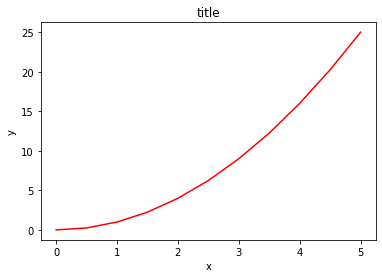

In [9]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

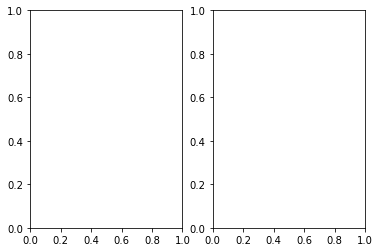

In [10]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [11]:
# Axes is an array of axes to plot on
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc780bb3f10>,
      dtype=object)

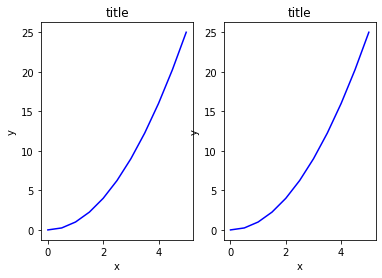

In [12]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

### Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [13]:
fig.savefig("filename.png")

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

Text(0.5, 1.0, 'title')

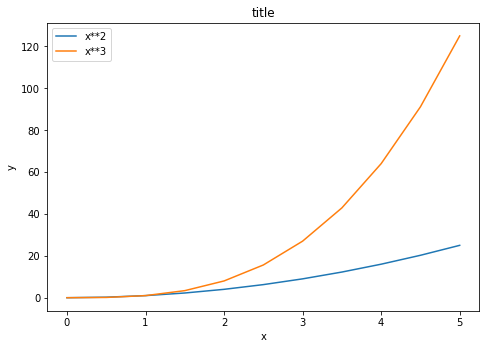

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.set_title("title")

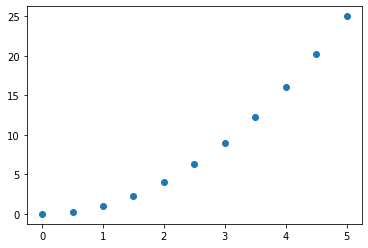

In [15]:
plt.scatter(x,y)

(array([ 6., 12.,  6., 11., 11.,  9., 11., 17.,  6., 11.]),
 array([  2. , 101.2, 200.4, 299.6, 398.8, 498. , 597.2, 696.4, 795.6,
        894.8, 994. ]),
 <a list of 10 Patch objects>)

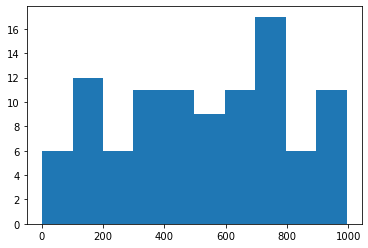

In [16]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

## Seaborn overview


Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [17]:
import seaborn as sns

In [18]:
# we use Seaborn's built-in data sets!
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### distplot

The distplot shows the distribution of a univariate set of observations.

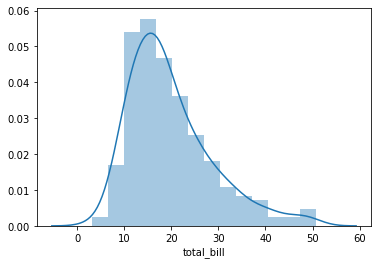

In [19]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

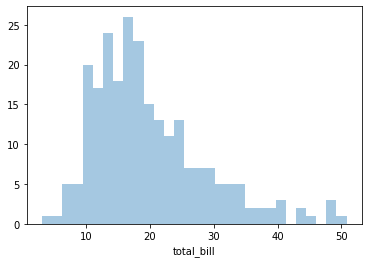

In [20]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

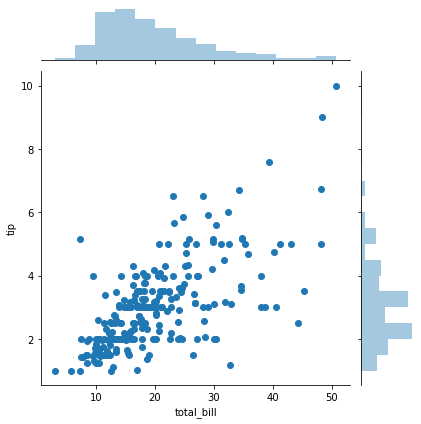

In [21]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

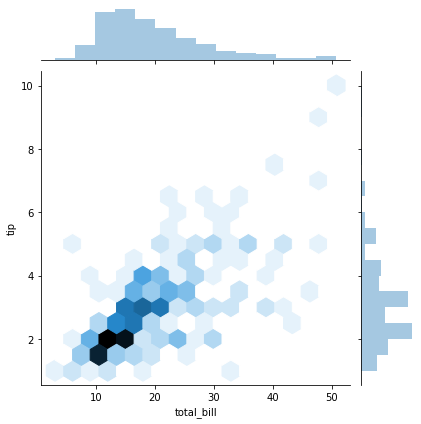

In [22]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

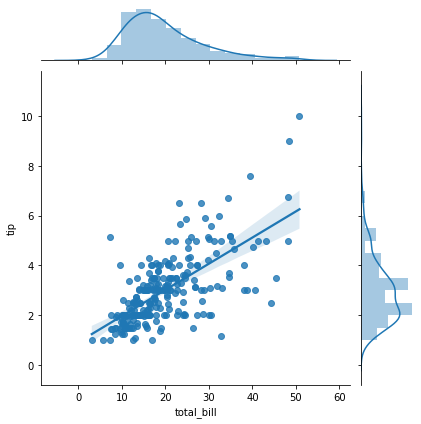

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

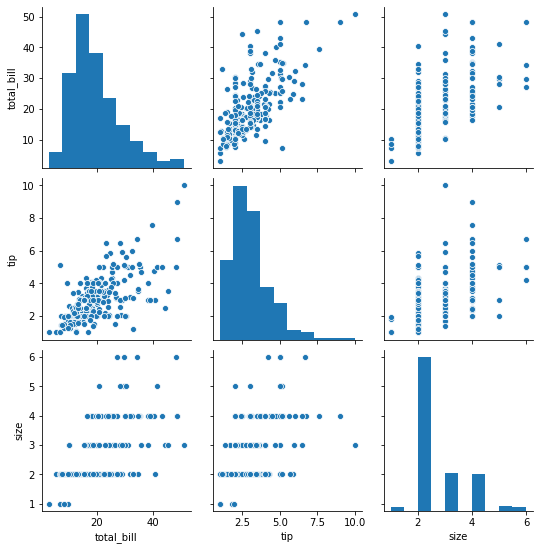

In [24]:
sns.pairplot(tips)

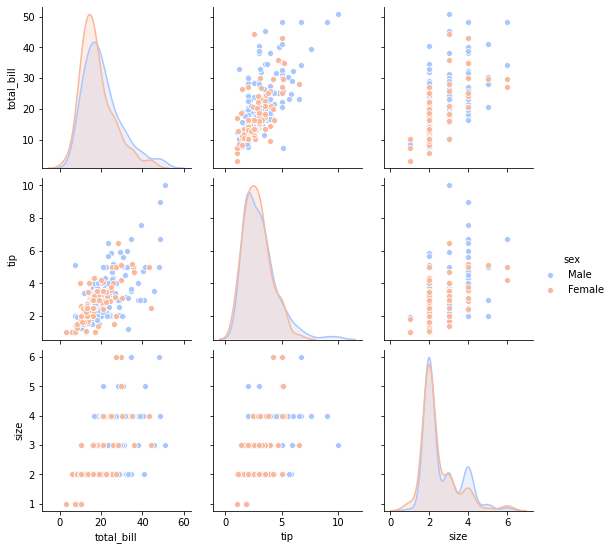

In [25]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

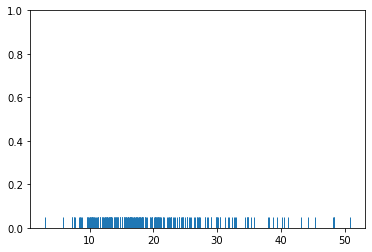

In [26]:
sns.rugplot(tips['total_bill'])